In [3]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import os

# just to be able to run on my mac, probably not necessary on other platforms
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

## Function to be approximated: sinus

In [63]:
linx = np.linspace(-5, 5, 10001)
sinus = np.sin(linx)

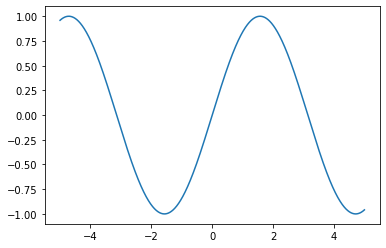

In [64]:
plt.plot(linx, sinus)

## Definition of the model 

Play with number of layers, number of neurons, ...

In [93]:
from keras import layers, models, optimizers

model = models.Sequential([
    layers.Dense(200, input_shape=(1,), activation='relu'),     
    layers.Dense(200, input_shape=(1,), activation='relu'),     
    layers.Dense(1), # no activation -> linear function of the input
])

model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 200)               400       
_________________________________________________________________
dense_54 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 201       
Total params: 40,801
Trainable params: 40,801
Non-trainable params: 0
_________________________________________________________________


In [94]:
opt = optimizers.Adam(learning_rate=0.005)
model.compile(loss='mse',
              optimizer=opt)
model.fit(linx, sinus, epochs=20, batch_size=50)

Epoch 1/20
10001/10001 [==============================] - 1s 110us/step - loss: 0.0808
Epoch 2/20
10001/10001 [==============================] - 1s 70us/step - loss: 0.0048
Epoch 3/20
10001/10001 [==============================] - 1s 69us/step - loss: 0.0018
Epoch 4/20
10001/10001 [==============================] - 1s 70us/step - loss: 0.0011
Epoch 5/20
10001/10001 [==============================] - 1s 69us/step - loss: 5.2149e-04
Epoch 6/20
10001/10001 [==============================] - 1s 69us/step - loss: 4.3000e-04
Epoch 7/20
10001/10001 [==============================] - 1s 70us/step - loss: 7.7311e-04
Epoch 8/20
10001/10001 [==============================] - 1s 71us/step - loss: 8.3942e-04
Epoch 9/20
10001/10001 [==============================] - 1s 71us/step - loss: 4.6658e-04
Epoch 10/20
10001/10001 [==============================] - 1s 71us/step - loss: 0.0017
Epoch 11/20
10001/10001 [==============================] - 1s 71us/step - loss: 7.1047e-04
Epoch 12/20
10001/10001 [==

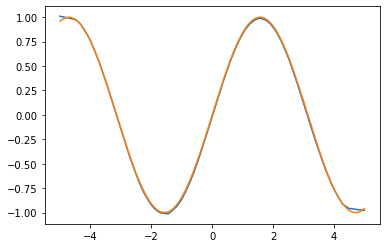

In [95]:
preds = model.predict(linx)
plt.plot(linx, preds)
plt.plot(linx, sinus)